# Challenge IA

## Notebook di training

In [1]:
!pip install -r requirements.txt

  Using cached numpy-1.18.1-cp38-cp38-macosx_10_9_x86_64.whl (15.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.5.0 requires numpy~=1.19.2, but you'll have numpy 1.18.1 which is incompatible.


## Import delle librerie necessarie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import del Training Set, del Test Set e delle Stats dei Pokemon

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
pokemon = pd.read_csv("./pokemon.csv")

## Exploratory Data Analysis

In [4]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combats: " + str(train.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combats: (32000, 3)


In [5]:
# stampo la lista delle feature
train.columns

Index(['Winner', 'First_pokemon', 'Second_pokemon'], dtype='object')

In [6]:
# stampo un sample per avere un'idea delle variabili
train.sample(5)

,Winner,First_pokemon,Second_pokemon
996,742,595,742
5596,301,301,643
16984,536,107,536
16420,377,377,27
7501,724,724,378


In [7]:
train.describe(include="all")

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,408.302250,400.581500,402.452063
std,231.131808,229.831285,230.277071
min,1.000000,1.000000,1.000000
25%,205.000000,202.000000,206.000000
50%,421.000000,400.000000,401.000000
75%,606.000000,599.000000,602.000000
max,800.000000,800.000000,800.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


In [9]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [10]:
pokemon.sample(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
399,400,Sealeo,Ice,Water,90,60,70,75,70,45,3,False
117,118,Koffing,Poison,NaN,40,65,95,60,45,35,1,False
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False
408,409,Salamence,Dragon,Flying,95,135,80,110,80,100,3,False
531,532,Rotom,Electric,Ghost,50,50,77,95,77,91,4,False


In [11]:
pokemon.describe(include='all')

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Nuzleaf,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [12]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [13]:
# per comodità rinomino la colonna # in ID, Type 1 in Type1 e Type 2 in Type2
pokemon = pokemon.rename(columns={'#': 'ID'})
pokemon = pokemon.rename(columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(columns={'Type 2': 'Type2'})

### Verifico se sono presenti valori nulli

In [14]:
train.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [15]:
pokemon.isnull().sum()

ID              0
Name            1
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Da questa analisi preliminare dei dati è possibile fare due osservazioni:
- La colonna **Type 2** presenta dei valori nulli, il che può anche essere ragionevole considerando con non tutti i Pokemon hanno necessariamente anche un tipo secondario. I Pokemon senza Type 2 sono ben 386 (li gestiremo in seguito).
- La colonna **Name** presenta anch'essa un valore nullo, andremo più a fondo per capire se possiamo risolvere in qualche modo.
- Abbiamo 800 Pokemon diversi nel dataset e 32.000 scontri registrati.

### Iniziamo col trovare il Pokemon mancante.

In [16]:
print("Pokemon precedente al Pokemon mancante: " + pokemon['Name'][61])

Pokemon precedente al Pokemon mancante: Mankey


In [17]:
pokemon[pokemon['Name'].isnull()]

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [18]:
print("Pokemon successivo al Pokemon mancante: " + pokemon['Name'][63])

Pokemon successivo al Pokemon mancante: Growlithe


Supponendo che gli indici seguano lo stesso sistema di numerazione del National Pokedex Number ([link](https://bulbapedia.bulbagarden.net/wiki/List_of_Pokémon_by_National_Pokédex_number)), possiamo cercare il Pokemon mancante che si trova in mezzo a Mankey e Growlithe. Il Pokemon mancante dovrebbe essere **Primeape**.

In [19]:
# aggiorniamo il nome del Pokemon che mancava
pokemon['Name'][62] = "Primeape"

<ipython-input-19-e2347c051bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Primeape"


In [20]:
pokemon['Name'][62]

'Primeape'

A questo punto a partire dal dataset contenente i combattimenti, calcoliamo la percentuale di vittoria di ciascun Pokemon.

In [21]:
# calcoliamo la percentuale di vittoria % di ogni pokemon 
# aggiungiamo il risultato al pokemon dataset 
total_Wins = train.Winner.value_counts()
# prendiamo il numero di vittorie per ogni pokemon
numberOfWins = train.groupby('Winner').count()

# entrambi i metodi producono lo stesso risultato
countByFirst = train.groupby('Second_pokemon').count()
countBySecond = train.groupby('First_pokemon').count()
print("Osserviamo la dimensione dei dataframe")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Osserviamo la dimensione dei dataframe
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


Notiamo che è presente un'anomalia. Le dimensioni dei due insiemi sono diverse dalle vittorie totali. Questo può significare solo che c'è un Pokemon che non è stato in grado di vincere durante i suoi combattimenti. Individuiamo il Pokemon che non ha vinto nemmeno un combattimento.

In [22]:
looser = np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 
looser_pokemon = pokemon.iloc[looser[0],]

looser_pokemon

ID                231
Name          Shuckle
Type1             Bug
Type2            Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object

**Shuckle** è il Pokemon che viene sempre sconfitto.

## Data Visualization

### Generations

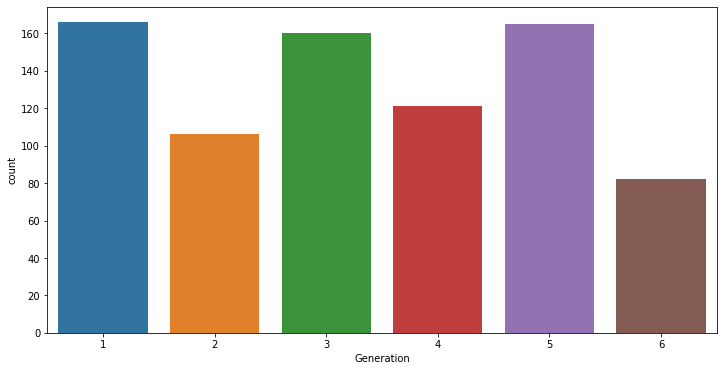

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(pokemon.Generation)

In [24]:
pokemon.groupby(['Generation'])['ID'].count()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: ID, dtype: int64

In [25]:
temp = pokemon
temp['Total'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']

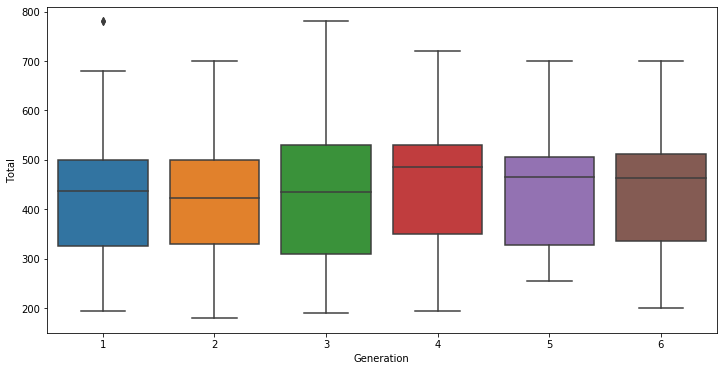

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Generation", y="Total", data=temp)

La quarta generazione sembrerebbe essere la più promettente, andiamo più a fondo.

In [27]:
generations = temp.groupby('Generation')[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].mean()
generations = generations.reset_index()
generations.index = generations.index + 1

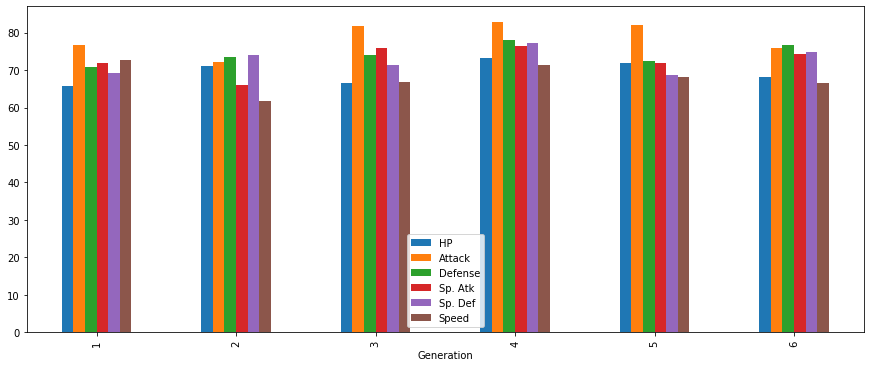

In [28]:
generations.plot(x="Generation", y=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], kind="bar", figsize=(15, 6))

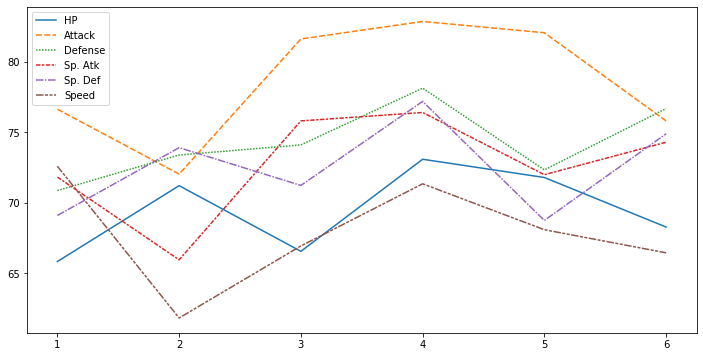

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=generations[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])

### Types

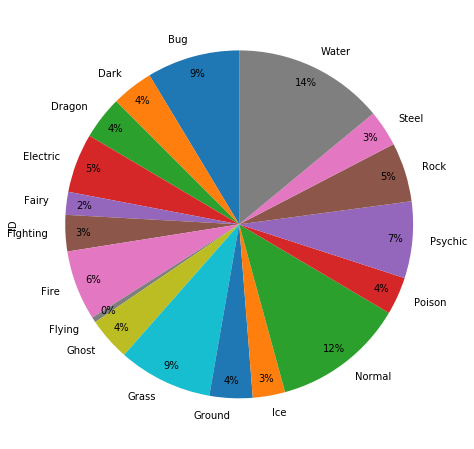

In [30]:
plt.figure(figsize=(8,8))
pokemon.groupby(['Type1'])['ID'].count().plot.pie(autopct='%1.0f%%', pctdistance=0.9, labeldistance=1.1, startangle=90)

In [31]:
pokemon.groupby(['Type1'])['ID'].count().sort_values(ascending=False)

Type1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: ID, dtype: int64

La maggior parte dei Pokemon è tipo 'Acqua' e 'Normale'.

### Types più frequenti per Generations

In [32]:
type_gen = pokemon.groupby(['Generation', 'Type1'])['ID'].count().reset_index()
type_gen = type_gen.sort_values(['Generation', 'ID'])
type_gen.groupby('Generation').tail(1)

,Generation,Type1,ID
14,1,Water,31
30,2,Water,18
46,3,Water,27
58,4,Normal,18
75,5,Normal,19
89,6,Ghost,10


Il tipo 'Acqua' domina le prime tre generazioni, dopodiché domina 'Normal' per le successive due generazioni.

### Pokemon più forti e più deboli

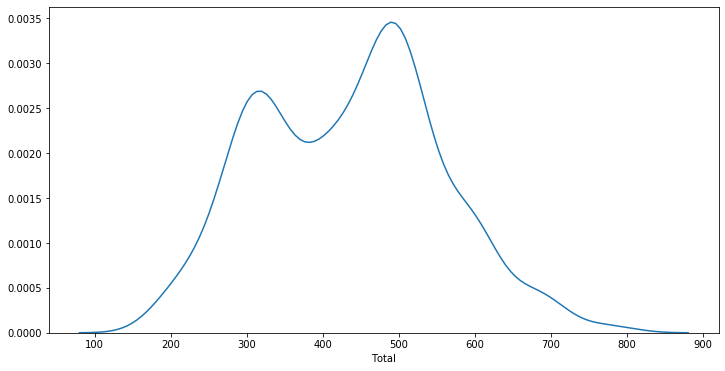

In [33]:
plt.figure(figsize=(12, 6))
sns.distplot(temp.Total, hist=False)

In [34]:
# I 10 Pokemon più forti
temp.iloc[temp.Total.nlargest(10).index.values][['Name', 'Total']]

,Name,Total
163,Mega Mewtwo X,780
164,Mega Mewtwo Y,780
426,Mega Rayquaza,780
422,Primal Kyogre,770
424,Primal Groudon,770
552,Arceus,720
268,Mega Tyranitar,700
409,Mega Salamence,700
413,Mega Metagross,700
418,Mega Latias,700


In [35]:
# I 10 Pokemon più deboli
temp.iloc[temp.Total.nsmallest(10).index.values][['Name', 'Total']]

,Name,Total
206,Sunkern,180
322,Azurill,190
446,Kricketot,194
13,Caterpie,195
16,Weedle,195
288,Wurmple,195
303,Ralts,198
139,Magikarp,200
381,Feebas,200
732,Scatterbug,200


### Scopriamo quale Type è più promettente e propenso a vincere

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


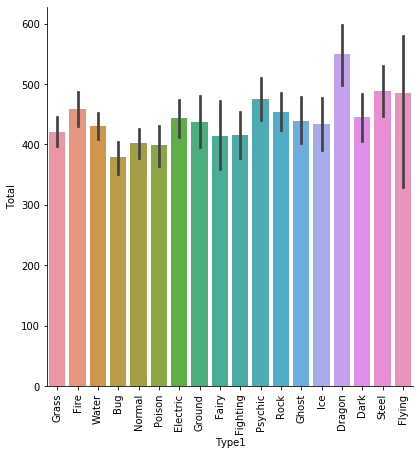

In [36]:
# Type1
t = sns.catplot(x='Type1', y='Total', kind='bar', data=temp, size=6)
t.set_xticklabels(rotation=90)

In [37]:
temp.groupby(['Type1'])['Total'].mean().reset_index().sort_values('Total', ascending=False)

,Type1,Total
2,Dragon,550.531250
16,Steel,487.703704
7,Flying,485.000000
14,Psychic,475.947368
6,Fire,458.076923
15,Rock,453.750000
1,Dark,445.741935
3,Electric,443.409091
8,Ghost,439.562500
10,Ground,437.500000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


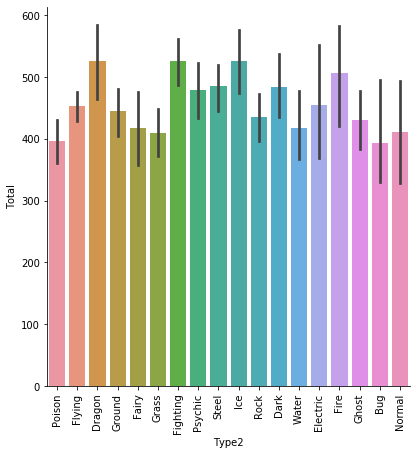

In [38]:
# Type2
t = sns.catplot(x='Type2', y='Total', kind='bar', data=temp, size=6)
t.set_xticklabels(rotation=90)

In [39]:
temp.groupby(['Type2'])['Total'].mean().reset_index().sort_values('Total', ascending=False)

,Type2,Total
2,Dragon,526.166667
5,Fighting,525.846154
11,Ice,525.714286
6,Fire,506.250000
16,Steel,485.227273
1,Dark,484.400000
14,Psychic,479.060606
3,Electric,455.333333
7,Flying,452.546392
10,Ground,444.342857


**Il miglior Type è dunque Dragon.**

### Legendary

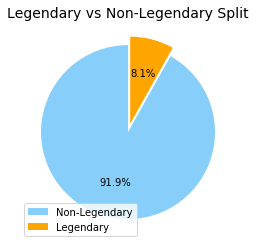

In [40]:
# Legendary vs Non-Legendary split
leg_split = [pokemon['Legendary'].value_counts()]
plt.pie(leg_split[0], autopct='%1.1f%%', colors = ['lightskyblue', 'orange'], explode = (0, 0.1), startangle=90)
plt.title('Legendary vs Non-Legendary Split', size = 14)
plt.legend(labels = ['Non-Legendary', 'Legendary'], loc = 'best')
plt.show()

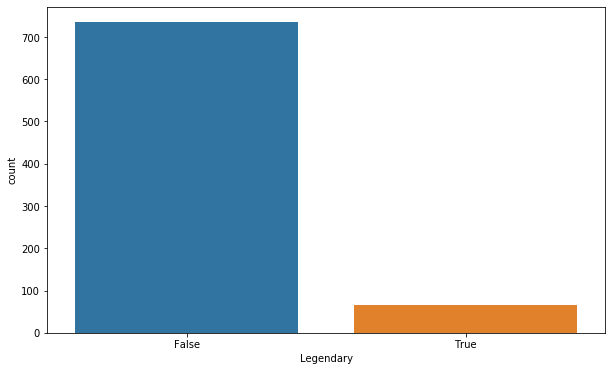

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(pokemon.Legendary)

Text(125, 150, 'Legendary')

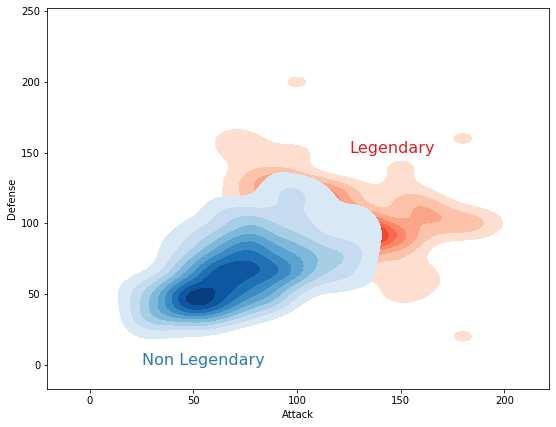

In [42]:
fig, ax = plt.subplots(figsize=(9, 7))
legendary = pokemon[pokemon.Legendary == True]
not_legendary = pokemon[pokemon.Legendary == False]

ax = sns.kdeplot(legendary.Attack, legendary.Defense,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(not_legendary.Attack, not_legendary.Defense,
                 cmap="Blues", shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(25, 0, "Non Legendary", size=16, color=blue)
ax.text(125, 150, "Legendary", size=16, color=red)

### Distribuzione dei Pokemon leggendari per Generations

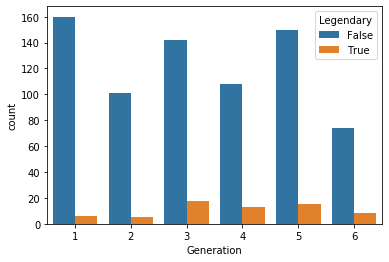

In [43]:
sns.countplot(x = 'Generation', hue = 'Legendary', data = pokemon)
plt.show()

La terza generazione racchiude la maggior parte dei Pokemon leggendari.

## Data Preparation e Feature Engineering

In [44]:
# codifico la colonna 'Winner' trasformando i valori in 1 se il vincitore è First_pokemon, 0 se vince Second_pokemon 

train.loc[train['Winner'] == train['First_pokemon'], 'Winner'] = 1
train.loc[train['Winner'] == train['Second_pokemon'], 'Winner'] = 0

test.loc[test['Winner'] == test['First_pokemon'], 'Winner'] = 1
test.loc[test['Winner'] == test['Second_pokemon'], 'Winner'] = 0

Fondo i dataset delle stats e dei combattimenti per avere più informazione possibile

In [45]:
fights = pd.merge(train, pokemon, left_on='First_pokemon', right_on='ID')
fights_test = pd.merge(test, pokemon, left_on='First_pokemon', right_on='ID')

In [46]:
fights = pd.merge(fights, pokemon, left_on='Second_pokemon', right_on='ID')
fights_test = pd.merge(fights_test, pokemon, left_on='Second_pokemon', right_on='ID')

In [47]:
fights.sample(5)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,...,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,Total_y
14995,0,83,635,83,Golem,Rock,Ground,80,120,130,...,NaN,75,95,60,65,60,115,5,False,470
25141,0,108,712,108,Kingler,Water,NaN,55,130,115,...,Ice,125,170,100,120,90,95,5,True,700
28417,1,413,98,413,Metagross,Steel,Psychic,80,135,130,...,NaN,30,65,100,45,25,40,1,False,305
26084,0,108,383,108,Kingler,Water,NaN,55,130,115,...,NaN,95,60,79,100,125,81,3,False,540
371,0,713,109,713,Kyurem White Kyurem,Dragon,Ice,125,120,90,...,NaN,40,30,50,55,55,100,1,False,330


### Analizziamo la correlazione tra le features

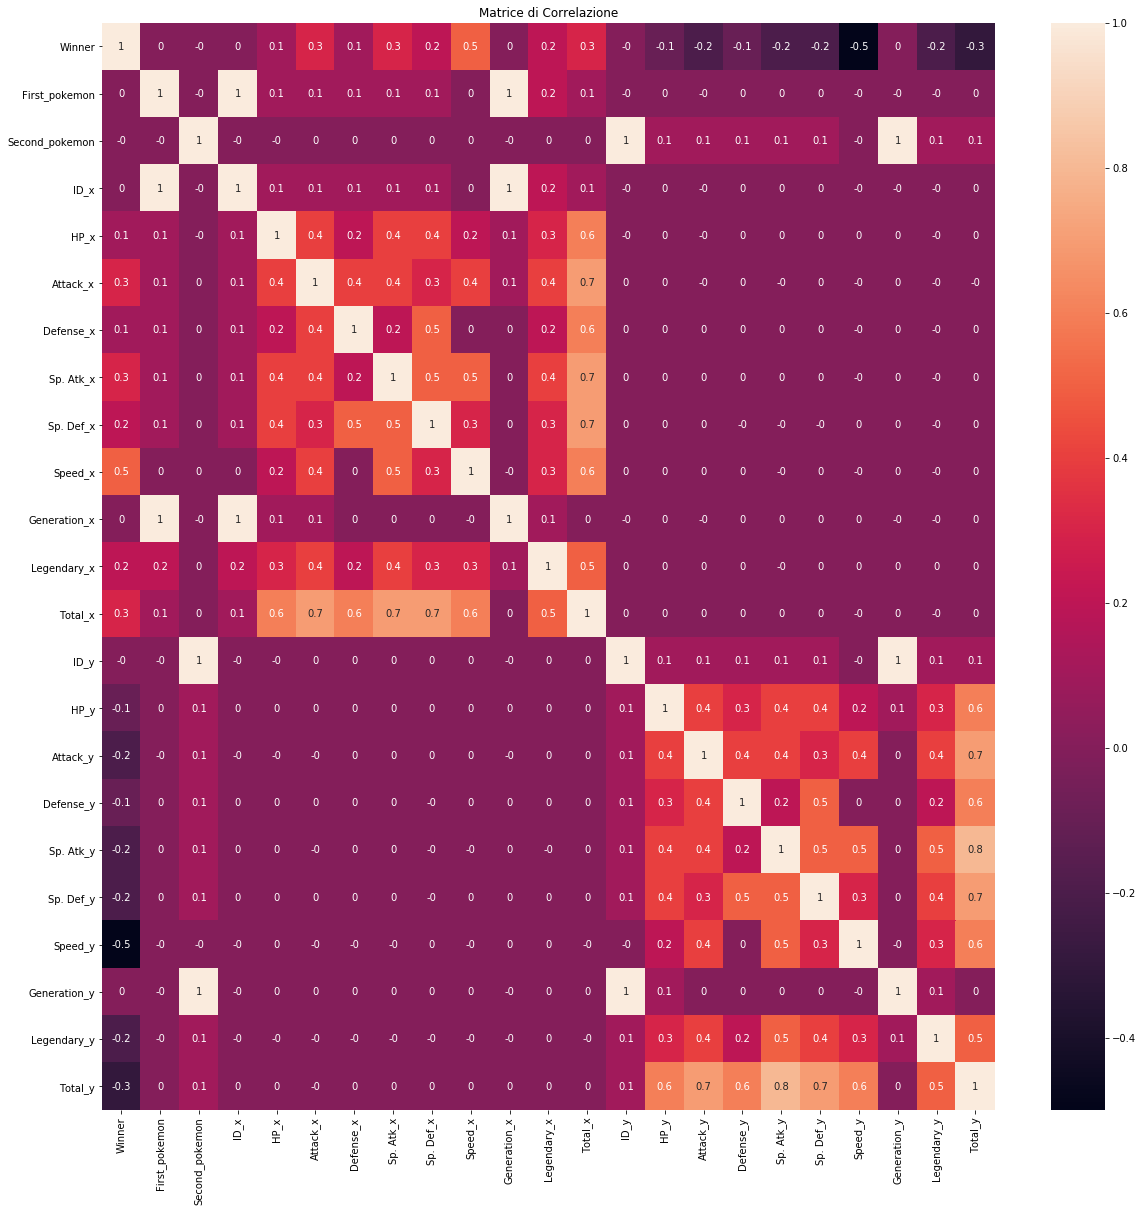

In [48]:
plt.figure(figsize = (20,20))
matrix = sns.heatmap(round(fights.corr(), 1), annot=True).set_title('Matrice di Correlazione')
plt.show()

### Rimuovo le features altamente correlate fra loro.

In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j] >= threshold and (corr_matrix.columns[j] not in col_corr)):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]

In [50]:
correlation(fights, 0.9)

In [51]:
fights["Legendary_x"] = fights["Legendary_x"].astype(int)
fights["Legendary_y"] = fights["Legendary_y"].astype(int)
fights_test["Legendary_x"] = fights_test["Legendary_x"].astype(int)
fights_test["Legendary_y"] = fights_test["Legendary_y"].astype(int)

### Aggiungiamo delle nuove features ottenute come differenza delle stats di ciascuna coppia di Pokemon che si scontra
Questa operazione ci aiuterà nel training del modello di ML.

In [52]:
fights["Sp_Atk_diff"] = fights["Sp. Atk_x"] - fights["Sp. Atk_y"]
fights["Speed_diff"] = fights["Speed_x"] - fights["Speed_y"]
fights["Sp_Def_diff"] = fights["Sp. Def_x"] - fights["Sp. Def_y"]
fights["Defense_diff"] = fights["Defense_x"] - fights["Defense_y"]
fights["HP_diff"] = fights["HP_x"] - fights["HP_y"]
fights["Attack_diff"] = fights["Attack_x"] - fights["Attack_y"]
fights["Legendary_diff"] = fights["Legendary_x"] - fights["Legendary_y"]

# Scarto la colonna 'Name' in quanto contiene valori univoci tutti diversi, pertanto non è una feature utile
fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

In [53]:
fights_test["Sp_Atk_diff"] = fights_test["Sp. Atk_x"] - fights_test["Sp. Atk_y"]
fights_test["Speed_diff"] = fights_test["Speed_x"] - fights_test["Speed_y"]
fights_test["Sp_Def_diff"] = fights_test["Sp. Def_x"] - fights_test["Sp. Def_y"]
fights_test["Defense_diff"] = fights_test["Defense_x"] - fights_test["Defense_y"]
fights_test["HP_diff"] = fights_test["HP_x"] - fights_test["HP_y"]
fights_test["Attack_diff"] = fights_test["Attack_x"] - fights_test["Attack_y"]
fights_test["Legendary_diff"] = fights_test["Legendary_x"] - fights_test["Legendary_y"]

fights_test = fights_test[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", 
                 "Defense_diff", "HP_diff", "Attack_diff", 
                 "Type1_x", "Type1_y", "Type2_x", "Type2_y", 
                 "Legendary_diff", "Winner"]]

### Gestione dei valori nulli di Type2

In [54]:
# gestione dei valori nulli di Type2, mettiamo "None" al posto di NaN
fights["Type2_x"].replace(np.nan, "None", inplace=True)
fights["Type2_y"].replace(np.nan, "None", inplace=True)

fights_test["Type2_x"].replace(np.nan, "None", inplace=True)
fights_test["Type2_y"].replace(np.nan, "None", inplace=True)

In [55]:
fights.sample(5)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
24920,0,10,15,-15,5,0,Bug,Dragon,None,None,0,1
10046,13,-11,10,72,20,50,Ghost,Grass,Grass,Flying,0,0
14619,-55,-71,5,45,-29,5,Steel,Flying,Fairy,None,-1,0
10267,-7,17,34,53,-23,-25,Water,Grass,None,None,1,1
17727,20,17,5,15,-16,50,Ground,Water,Flying,Ground,1,1


### Verifichiamo nuovamente la correlazione fra le nuove features

In [56]:
fights.corr()

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Legendary_diff,Winner
Sp_Atk_diff,1.000000,0.478341,0.502614,0.215446,0.366388,0.401023,0.457161,0.347794
Speed_diff,0.478341,1.000000,0.254007,0.006347,0.185681,0.383637,0.330710,0.675713
Sp_Def_diff,0.502614,0.254007,1.000000,0.504351,0.382909,0.268434,0.354042,0.220654
Defense_diff,0.215446,0.006347,0.504351,1.000000,0.247241,0.438723,0.240651,0.076274
HP_diff,0.366388,0.185681,0.382909,0.247241,1.000000,0.426676,0.280502,0.195215
Attack_diff,0.401023,0.383637,0.268434,0.438723,0.426676,1.000000,0.351590,0.360084
Legendary_diff,0.457161,0.330710,0.354042,0.240651,0.280502,0.351590,1.000000,0.240195
Winner,0.347794,0.675713,0.220654,0.076274,0.195215,0.360084,0.240195,1.000000


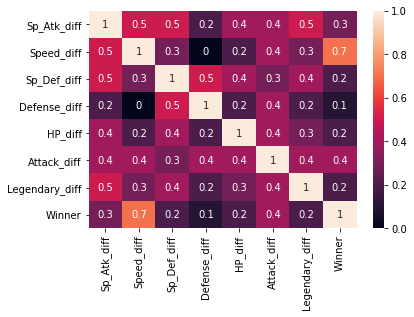

In [57]:
sns.heatmap(round(fights.corr(), 1), annot=True)
plt.show()

In [58]:
# La feature 'Defense_diff' ha una correlazione molto bassa, può dunque essere rimossa.
fights = fights.drop('Defense_diff', axis=1)
fights_test = fights_test.drop('Defense_diff', axis=1)

### Label Encoding

**Label Encoding** è una tecnica di codifica per la gestione delle categorical variables. Con questa tecnica, ad ogni dato viene assegnato un numero intero univoco.

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

s = (fights.dtypes == 'object')
labelEncoding_cols = list(s[s].index)

fights[labelEncoding_cols] = fights[labelEncoding_cols].astype('category')
fights_test[labelEncoding_cols] = fights_test[labelEncoding_cols].astype('category')

for column in labelEncoding_cols:
    fights[column] = encoder.fit_transform(fights[column])
    fights_test[column] = encoder.fit_transform(fights_test[column])

### Normalizzo le variabili continue

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

fights[['Sp_Atk_diff', 'Speed_diff', 'Sp_Def_diff', 'HP_diff', 'Attack_diff', 'Type1_x', 'Type2_x', 'Type2_y']] = scaler.fit_transform(fights[['Sp_Atk_diff', 'Speed_diff', 'Sp_Def_diff', 'HP_diff', 'Attack_diff', 'Type1_x', 'Type2_x', 'Type2_y']])

fights_test[['Sp_Atk_diff', 'Speed_diff', 'Sp_Def_diff', 'HP_diff', 'Attack_diff', 'Type1_x', 'Type2_x', 'Type2_y']] = scaler.fit_transform(fights_test[['Sp_Atk_diff', 'Speed_diff', 'Sp_Def_diff', 'HP_diff', 'Attack_diff', 'Type1_x', 'Type2_x', 'Type2_y']])


In [61]:
fights.sample(5)

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Legendary_diff,Winner
6376,2.370372,0.485886,1.778100,0.561786,2.165519,0.802477,12,-2.518425,0.411232,1,1
3628,1.184482,0.244320,0.761433,1.123891,0.758352,-1.346969,15,-1.986575,2.001878,1,1
4262,0.968866,0.389259,-0.204400,0.421260,-0.215840,-1.526090,15,-0.922876,-2.770060,0,1
10403,-0.863874,-0.963510,-0.255233,-0.843474,-0.215840,-0.988728,4,-0.922876,-0.914307,0,0
10269,-0.195463,0.920704,-0.788983,-1.658526,-0.259138,-1.526090,9,0.406749,0.411232,0,1


## Definizione del modello

In [62]:
X_train = fights.drop(["Winner"], axis=1)
y_train = fights["Winner"]

X_test = fights_test.drop(["Winner"], axis=1)
y_test = fights_test["Winner"]

### Random Forest
Il **Random Forest** genera una moltitudine di Decision Tree ed ogni singolo albero nella foresta a sua volta genera una previsione. Al termine dell'esecuzione si sceglie la classe di previsione che è stata predetta per la maggiore tra gli alberi. In genere il Random Forest risulta performare meglio rispetto al Decision Tree.

In [67]:
# fase di training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score

model = RandomForestClassifier()
model = model.fit(X_train, y_train)
    
pred = model.predict(X_test)

# verifo l'accuracy del modello
print("Accuracy: {:.2f}%".format(accuracy_score(pred, y_test)*100))

Accuracy: 95.10%


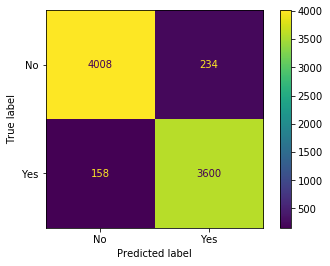

In [68]:
# plot della matrice di confusione
plot_confusion_matrix(model, X_test, y_test, values_format='n', display_labels=['No','Yes']) 
plt.show()